In [1]:
# import the library
%matplotlib inline

import math, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

# sklearn :: evaluation metrics
from sklearn.metrics import cohen_kappa_score

import plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sns.set_style('whitegrid')

# Problem definition

Apply classification models to predict pet adoption

# Load the data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

# NANs

In [3]:
#print(df_train.dtypes)
#print(df_train['review_scores_rating'].describe())
#print(df_train.head(5))

print(df_train.shape, df_test.shape)
print(df_train.columns)
#checking for the NAN
# print('Number of NAN per feature: \n', df_train.isnull().sum())
# print('Number of NAN per feature: \n', df_test.isnull().sum())

(10000, 24) (4993, 23)
Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


### Select the and reassign df_train to df

In [4]:
X_columns = ['PetID', 
             'Fee', 
             'Age',  
             'VideoAmt',  'PhotoAmt', 
             'Gender', 
             'Type', 
             'Quantity', 
             'MaturitySize', 
             'FurLength', 
             'Color1', 'Color2', 'Color3', 
             'Breed1',  'Breed2',
             'Vaccinated', 'Dewormed', 'Sterilized',
             'Description',
             'Health',
              'State'
             #'RescuerID'
             #'Name'
            ]
y_column = ['AdoptionSpeed']

df = df_train[X_columns + y_column].copy()
df_test = df_test[X_columns].copy()
print(df.shape)

#checking for the NANs
print('Number of NAN per feature in df: \n', df.isnull().sum())
print('Number of NAN per feature in df_test: \n', df_test.isnull().sum())

(10000, 22)
Number of NAN per feature in df: 
 PetID            0
Fee              0
Age              0
VideoAmt         0
PhotoAmt         0
Gender           0
Type             0
Quantity         0
MaturitySize     0
FurLength        0
Color1           0
Color2           0
Color3           0
Breed1           0
Breed2           0
Vaccinated       0
Dewormed         0
Sterilized       0
Description      8
Health           0
State            0
AdoptionSpeed    0
dtype: int64
Number of NAN per feature in df_test: 
 PetID           0
Fee             0
Age             0
VideoAmt        0
PhotoAmt        0
Gender          0
Type            0
Quantity        0
MaturitySize    0
FurLength       0
Color1          0
Color2          0
Color3          0
Breed1          0
Breed2          0
Vaccinated      0
Dewormed        0
Sterilized      0
Description     4
Health          0
State           0
dtype: int64


# Feature Engineering 

### Name

In [5]:
# for item in [df, df_test]:
#     #item['NoName'] = [1 if ('NONAME' in str(s).upper().replace(' ','')) | (s == '') | (type(s) == float) | ('!' in str(s)) else 0 for s in item['Name']] 
#     item['NoName'] = [1 if ('NONAME' in str(s).upper().replace(' ','')) | (s == '') | (type(s) == float) else 0 for s in item['Name']] 
#     del item['Name']
# print(item.groupby('NoName')['PetID'].count())

### Free

In [6]:
# df.groupby('Fee')['PetID'].count()

# for item in [df, df_test]:
#     #item['NoName'] = [1 if ('NONAME' in str(s).upper().replace(' ','')) | (s == '') | (type(s) == float) | ('!' in str(s)) else 0 for s in item['Name']] 
#     item['Free'] = [1 if f == 0 else 0 for f in item['Fee']] 
    
# print(item.groupby('Free')['PetID'].count())

### Pure Breed

In [7]:
# for item in [df, df_test]:
#     item['Breed'] = [1 if (b[0] != 0) | (b[1] == 0) else 0 for b in zip(item['Breed1'], item['Breed2'])] 
#     #item['Free'] = [1 if f == 0 else 0 for f in item['Fee']] 
    
# print(item.groupby('Breed')['PetID'].count())

### RescuerID

In [8]:
# len(df['RescuerID'].unique())


### Create "double" columns 

In [9]:
# cols = ['Type', 'Breed', 'Gender', #'Color1', 'Color2', 'Color3', 
#         'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
#        'Sterilized', 'Health', 'NoName', 'Free']

# add_cols = []
# for col1 in cols:
#     for col2 in cols:
#         if col1 != col2:
#             df[col1 + '_' + col2] = df[col1].astype(str) + '_' + df[col2].astype(str)
#             df_test[col1 + '_' + col2] = df_test[col1].astype(str) + '_' + df_test[col2].astype(str)
#             add_cols.append(col1 + '_' + col2)
            
# cols = cols + add_cols

# #%%time

# indexer = {}
# for col in cols:
#     # print(col)
#     _, indexer[col] = pd.factorize(df[col].astype(str))
    
# for col in cols:#tqdm_notebook(cols):
#     # print(col)
#     df[col] = indexer[col].get_indexer(df[col].astype(str))
#     df_test[col] = indexer[col].get_indexer(df_test[col].astype(str))
# df.head(10)

### Color

In [10]:
# for item in [df, df_test]:
#     for i in range(1,8):
#         item['col'+ str(i)] = [1 if (j[0] == i) | (j[1] == i) | (j[2] == i) else 0 for j in zip(item['Color1'],item['Color2'],item['Color3'])] 
#         #item['col'+ str(i)] = [1 if j == i else 0 for j in item['Color1']]
#     del item['Color1']
#     del item['Color2']
#     del item['Color3']
# df.head()

# -------------------------------------------------------------------

# df_dummies = pd.get_dummies(df['Color1'], prefix='col1')
# df = pd.concat([df, df_dummies], axis=1)
# del df['Color1']
# df_dummies = pd.get_dummies(df_test['Color1'], prefix='col1')
# df_test = pd.concat([df_test, df_dummies], axis=1)
# del df_test['Color1']
    
# df_dummies = pd.get_dummies(df['Color2'], prefix='col2')
# df = pd.concat([df, df_dummies], axis=1)
# del df['Color2']
# df_dummies = pd.get_dummies(df_test['Color2'], prefix='col2')
# df_test = pd.concat([df_test, df_dummies], axis=1)
# del df_test['Color2']

# df_dummies = pd.get_dummies(df['Color3'], prefix='col3')
# df = pd.concat([df, df_dummies], axis=1)
# del df['Color3']
# df_dummies = pd.get_dummies(df_test['Color3'], prefix='col3')
# df_test = pd.concat([df_test, df_dummies], axis=1)
# del df_test['Color3']
    
# -------------------------------------------------------------------
   
#print(df.head(10))
# indexer = {}
# _, indexer['Color1'] = pd.factorize(df['Color1'].astype(str))
# _, indexer['Color2'] = pd.factorize(df['Color2'].astype(str))
# _, indexer['Color3'] = pd.factorize(df['Color3'].astype(str))

# #print(indexer)
# df['Color1'] = indexer['Color1'].get_indexer(df['Color1'].astype(str))
# df['Color2'] = indexer['Color1'].get_indexer(df['Color2'].astype(str))
# df['Color3'] = indexer['Color1'].get_indexer(df['Color3'].astype(str))

# df_test['Color1'] = indexer['Color1'].get_indexer(df_test['Color1'].astype(str))
# df_test['Color2'] = indexer['Color1'].get_indexer(df_test['Color2'].astype(str))
# df_test['Color3'] = indexer['Color1'].get_indexer(df_test['Color3'].astype(str))
# -------------------------------------------------------------------

# color_cols = ['Color1', 'Color2', 'Color3']
# for i in color_cols:
#     df_test.loc[:, i] = pd.factorize(df_test.loc[:, i])[0]

# for i in color_cols:
#     df.loc[:, i] = pd.factorize(df.loc[:, i])[0]    

# print(df.head(10))

In [11]:
df_test.head(20)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,FurLength,...,Color2,Color3,Breed1,Breed2,Vaccinated,Dewormed,Sterilized,Description,Health,State
0,f42161740,0,1,0,10.0,1,2,1,2,1,...,7,0,266,266,2,2,2,Found this male kitten today. He looks healthy...,1,41326
1,0118db3a8,0,6,0,2.0,2,1,1,1,1,...,0,0,307,0,1,1,2,I need a new home!! Contact Furry Friends Farm...,1,41326
2,e5164d828,0,2,0,2.0,2,1,1,2,1,...,0,0,307,0,3,1,2,very playful cute little puppy for adoption. R...,1,41401
3,5335bfb38,0,10,0,0.0,1,1,1,2,2,...,0,0,128,0,1,1,2,"bullet is a wonderful, loving dog. the kind th...",1,41326
4,ff2cf88a0,0,12,0,2.0,1,1,1,2,1,...,0,0,307,0,1,1,1,Meet Jackson. He's a eye catcher and always re...,1,41326
5,1d13441b9,0,1,0,1.0,2,2,1,1,1,...,2,0,266,0,2,2,2,rescued kitten for adoption.need to feed via s...,1,41325
6,7d835cf7c,0,4,0,9.0,3,2,5,1,1,...,3,7,266,0,2,1,2,"very healthy kitten,cute, litter train, deworm...",1,41326
7,577d15fea,0,3,0,1.0,2,1,1,2,2,...,0,0,307,0,1,1,2,Lulu is an active girl who needs a home. She i...,1,41326
8,91736f444,0,2,0,4.0,3,1,4,2,1,...,2,0,307,0,2,2,2,"Blue eye puppies for adoption, very cute and f...",1,41332
9,db194aec8,0,2,0,6.0,3,2,3,1,1,...,7,0,265,0,2,2,2,All three of them will be 2 months old in a we...,1,41326


### Fur Length

In [12]:
for item in [df, df_test]:
    fur = pd.get_dummies(item['FurLength'], prefix='fur')
    for col in fur.columns:
        item[col] = fur[col]
    del item['FurLength']

df.head(5)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,Vaccinated,Dewormed,Sterilized,Description,Health,State,AdoptionSpeed,fur_1,fur_2,fur_3
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,1,2,1,Adorable 3 year old Lily looking for a forever...,1,41326,4,0,1,0
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,2,1,2,i rescue this stary kitten from market near my...,1,41327,2,1,0,0
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,1,1,2,The mother was a Burmese cross and had since p...,1,41327,4,1,0,0
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,2,2,2,This puppy is: 1. Male 2. 3 months old 3. Brow...,1,41327,2,1,0,0
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,2,2,2,Mother cat gave birth to a litter of 3 and too...,1,41401,2,1,0,0


### Maturity Size

In [13]:
# for item in [df, df_test]:
#     mat = pd.get_dummies(item['MaturitySize'], prefix='mat')
#     for col in mat.columns:
#         item[col] = mat[col]
#     del item['MaturitySize']

# df.head(5)

### Sterelized

In [14]:
for item in [df, df_test]:
    ster = pd.get_dummies(item['Sterilized'], prefix='ster')
    for col in ster.columns:
        item[col] = ster[col]
    del item['Sterilized']

df.head(5)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,Description,Health,State,AdoptionSpeed,fur_1,fur_2,fur_3,ster_1,ster_2,ster_3
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,Adorable 3 year old Lily looking for a forever...,1,41326,4,0,1,0,1,0,0
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,i rescue this stary kitten from market near my...,1,41327,2,1,0,0,0,1,0
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,The mother was a Burmese cross and had since p...,1,41327,4,1,0,0,0,1,0
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,This puppy is: 1. Male 2. 3 months old 3. Brow...,1,41327,2,1,0,0,0,1,0
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,Mother cat gave birth to a litter of 3 and too...,1,41401,2,1,0,0,0,1,0


### Dewormed

In [15]:
for item in [df, df_test]:
    dew = pd.get_dummies(item['Dewormed'], prefix='dewor')
    for col in dew.columns:
        item[col] = dew[col]
    del item['Dewormed']

df_test.head(5)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,State,fur_1,fur_2,fur_3,ster_1,ster_2,ster_3,dewor_1,dewor_2,dewor_3
0,f42161740,0,1,0,10.0,1,2,1,2,1,...,41326,1,0,0,0,1,0,0,1,0
1,0118db3a8,0,6,0,2.0,2,1,1,1,2,...,41326,1,0,0,0,1,0,1,0,0
2,e5164d828,0,2,0,2.0,2,1,1,2,3,...,41401,1,0,0,0,1,0,1,0,0
3,5335bfb38,0,10,0,0.0,1,1,1,2,7,...,41326,0,1,0,0,1,0,1,0,0
4,ff2cf88a0,0,12,0,2.0,1,1,1,2,2,...,41326,1,0,0,1,0,0,1,0,0


### Vaccinated

In [16]:
for item in [df, df_test]:
    vac = pd.get_dummies(item['Vaccinated'], prefix='vac')
    for col in vac.columns:
        item[col] = vac[col]
    del item['Vaccinated']

df_test.head(5)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,fur_3,ster_1,ster_2,ster_3,dewor_1,dewor_2,dewor_3,vac_1,vac_2,vac_3
0,f42161740,0,1,0,10.0,1,2,1,2,1,...,0,0,1,0,0,1,0,0,1,0
1,0118db3a8,0,6,0,2.0,2,1,1,1,2,...,0,0,1,0,1,0,0,1,0,0
2,e5164d828,0,2,0,2.0,2,1,1,2,3,...,0,0,1,0,1,0,0,0,0,1
3,5335bfb38,0,10,0,0.0,1,1,1,2,7,...,0,0,1,0,1,0,0,1,0,0
4,ff2cf88a0,0,12,0,2.0,1,1,1,2,2,...,0,1,0,0,1,0,0,1,0,0


### State

In [17]:
# list = []
# for item in [df, df_test]:
#     gr = item.groupby('State')['PetID'].count()
#     #print(gr)
#     #plt.bar(gr.index, gr.values, alpha=0.5)
#     list = gr[gr.values>150].index
#     #print(list)
# list_state = list.values
# print(list_state)

# for item in [df, df_test]:
#     for i in list_state:
#         item[i] = [1 if j == i else 0 for j in item['State']]
#     del item['State']
    
for item in [df, df_test]:
    state = pd.get_dummies(item['State'], prefix='st')
    for col in state.columns:
        item[col] = state[col]
    del item['State']

df.head(5)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,st_41330,st_41332,st_41335,st_41336,st_41342,st_41345,st_41361,st_41367,st_41401,st_41415
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,0,0,0,0,0,0,0,0,0,0
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,0,0,0,0,0,0,0,0,0,0
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,0,0,0,0,0,0,0,0,0,0
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,0,0,0,0,0,0,0,0,1,0


### Description

In [18]:
for item in [df, df_test]:
    for i, cell in enumerate(item['Description']):
        if pd.isnull(cell):
            item.loc[i, 'Description'] = 's'
            #print(item.loc[i, 'Description'])
print(df['Description'].isnull().sum())

for item in [df, df_test]:
    item['num_words'] = [len(s.split(' ')) for s in item['Description']]
    item['ave_len_words'] = [round(len(s)/len(s.split(' ')),2) for s in item['Description']]
    item['desc_len'] = [len(s) for s in item['Description']]
    item['num_words']
    del item['Description']
df.head()

0


,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,st_41336,st_41342,st_41345,st_41361,st_41367,st_41401,st_41415,num_words,ave_len_words,desc_len
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,0,0,0,0,0,0,0,41,5.59,229
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,0,0,0,0,0,0,0,36,4.78,172
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,0,0,0,0,0,0,0,96,5.52,530
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,0,0,0,0,0,0,0,68,4.97,338
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,0,0,0,0,0,1,0,67,5.18,347


In [19]:
print(df.loc[0,:])

PetID            3f8824a3b
Fee                      0
Age                     36
VideoAmt                 0
PhotoAmt                 1
Gender                   2
Type                     1
Quantity                 1
MaturitySize             2
Color1                   2
Color2                   7
Color3                   0
Breed1                 307
Breed2                   0
Health                   1
AdoptionSpeed            4
fur_1                    0
fur_2                    1
fur_3                    0
ster_1                   1
ster_2                   0
ster_3                   0
dewor_1                  0
dewor_2                  1
dewor_3                  0
vac_1                    1
vac_2                    0
vac_3                    0
st_41324                 0
st_41325                 0
st_41326                 1
st_41327                 0
st_41330                 0
st_41332                 0
st_41335                 0
st_41336                 0
st_41342                 0
s

### Gender

In [20]:
# for item in [df, df_test]:
#     print(item['Gender'].unique())

# for item in [df, df_test]:
#     gen = pd.get_dummies(item['Gender'], prefix='gen')
#     for col in gen.columns:
#         item[col] = gen[col]
#     del item['Gender']
#     #del item['gen_3']
# df.head(5)

### Health

In [21]:
# for item in [df, df_test]:
#     print(item['Health'].unique())

for item in [df, df_test]:
    ster = pd.get_dummies(item['Health'], prefix='health')
    for col in ster.columns:
        item[col] = ster[col]
    del item['Health']

df.head(5)

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,st_41361,st_41367,st_41401,st_41415,num_words,ave_len_words,desc_len,health_1,health_2,health_3
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,0,0,0,0,41,5.59,229,1,0,0
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,0,0,0,0,36,4.78,172,1,0,0
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,0,0,0,0,96,5.52,530,1,0,0
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,0,0,0,0,68,4.97,338,1,0,0
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,0,0,1,0,67,5.18,347,1,0,0


### Breed

In [22]:
# # plt.figure(figsize=(20,10))
# # for item in [df, df_test]:
# #     gr = item.groupby('Breed1')['id'].count()
# #     print(gr)
# #     plt.bar(gr.index, gr.values, alpha=0.5)

# for item in [df, df_test]:
#     for i in range(1,308):
#         #item['br'+str(i)] = [1 if (j[0] == i) | (j[1] == i) else 0 for j in zip(item['Breed1'],item['Breed2'])] 
#         item['br'+str(i)] = [1 if j == i else 0 for j in item['Breed1']]
#     #del item['br307']
#     del item['Breed1']
#     #del item['Breed2']
# df.head()
# -------------------------------------------------------------------

# col = 'Breed1'
# df_dummies = pd.get_dummies(df[col])
# df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
# df = pd.concat([df, df_dummies], axis=1)

# df_dummies = pd.get_dummies(df_test[col], prefix='br1')
# df_test = pd.concat([df_test, df_dummies], axis=1)

# col = 'Breed2'
# df_dummies = pd.get_dummies(df[col])
# df_dummies.columns = [str(col)+'_'+str(c) for c in df_dummies.columns]
# df = pd.concat([df, df_dummies], axis=1)

# df_dummies = pd.get_dummies(df_test[col], prefix='br2')
# df_test = pd.concat([df_test, df_dummies], axis=1)

# -------------------------------------------------------------------

# for item in [df, df_test]:
#     ster = pd.get_dummies(item['Breed1'], prefix='br1')
#     for col in ster.columns:
#         item[col] = ster[col]
#     del item['Breed1']
    
# for item in [df, df_test]:
#     ster = pd.get_dummies(item['Breed2'], prefix='br2')
#     for col in ster.columns:
#         item[col] = ster[col]
#     del item['Breed2']

# indexer = {}
# _, indexer['Breed1'] = pd.factorize(df['Breed1'].astype(str))
# _, indexer['Breed2'] = pd.factorize(df['Breed2'].astype(str))

# #print(indexer)
# df['Breed1'] = indexer['Breed1'].get_indexer(df['Breed1'].astype(str))
# df['Breed2'] = indexer['Breed2'].get_indexer(df['Breed2'].astype(str))

# df_test['Breed1'] = indexer['Breed1'].get_indexer(df_test['Breed1'].astype(str))
# df_test['Breed2'] = indexer['Breed2'].get_indexer(df_test['Breed2'].astype(str))

# print(df.head(10))
# -------------------------------------------------------------------
# color_cols = ['Breed1', 'Breed2']
# for i in color_cols:
#     df_test.loc[:, i] = pd.factorize(df_test.loc[:, i])[0]

# for i in color_cols:
#     df.loc[:, i] = pd.factorize(df.loc[:, i])[0]    

# print(df.head(10))

### Type

In [23]:
# # for item in [df, df_test]:
# #     print(item['Type'].unique())

# for item in [df, df_test]:
#     typ = pd.get_dummies(item['Type'], prefix='type')
#     for col in typ.columns:
#         item[col] = typ[col]
#     del item['Type']

# df_test.head(5)

### Quantity

In [24]:
# for item in [df, df_test]:
#     print(item['Quantity'].unique())

# for item in [df, df_test]:
#     for i in range(1,21):
#         item['qty'+str(i)] = [1 if j == i else 0 for j in item['Quantity']] 
#     del item['Quantity']
    

# list_qty = ['qty1', 'qty2', 'qty3', 'qty4-6', 'qty7-10', 'qty11-20'] 
# list_number_min = [1, 2, 3, 4, 7, 11]
# list_number_max = [1, 2, 3, 6, 10, 20]

# def create_column(col, el_min, el_max):
#     column = []
#     for i in col:
#         if (i >= el_min) & (i <= el_max):
#             column.append(1)
#         else:
#             column.append(0)
#     return column

# for item in [df, df_test]:
#     for i in range(len(list_qty)):
#         item[list_qty[i]] = create_column(item['Quantity'], list_number_min[i], list_number_max[i]) 
#     del item['Quantity']

# df.head(5)

removing big numbers

In [25]:
# print(df['Quantity'].describe())

# mean_a = np.mean(df['Quantity'])
# std_a = np.std(df['Quantity'])

# df = df[(df['Quantity']>mean_a-3*std_a)&(df['Quantity']<mean_a+3*std_a)]

# print('After removing outliers:')
# print(df['Quantity'].describe())

# plt.figure()
# plt.hist(df['Quantity'])
# plt.show

# df.head()

### Age

In [26]:
# print(df['Age'].describe())
# print(df_test['Age'].describe())

# plt.hist(df['Age'], alpha = 0.5)
# plt.hist(df_test['Age'], alpha = 0.5)

In [27]:
df.head()

,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,st_41361,st_41367,st_41401,st_41415,num_words,ave_len_words,desc_len,health_1,health_2,health_3
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,0,0,0,0,41,5.59,229,1,0,0
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,0,0,0,0,36,4.78,172,1,0,0
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,0,0,0,0,96,5.52,530,1,0,0
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,0,0,0,0,68,4.97,338,1,0,0
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,0,0,1,0,67,5.18,347,1,0,0


outliers

count    10000.000000
mean        10.548400
std         18.163272
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64
After removing outliers:
count    9749.000000
mean        8.480357
std        12.225582
min         0.000000
25%         2.000000
50%         3.000000
75%        10.000000
max        65.000000
Name: Age, dtype: float64


,PetID,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,...,st_41361,st_41367,st_41401,st_41415,num_words,ave_len_words,desc_len,health_1,health_2,health_3
0,3f8824a3b,0,36,0,1.0,2,1,1,2,2,...,0,0,0,0,41,5.59,229,1,0,0
1,9238eb7fc,0,3,0,1.0,1,2,1,2,6,...,0,0,0,0,36,4.78,172,1,0,0
2,f0a1f2b90,0,7,0,2.0,1,2,4,2,1,...,0,0,0,0,96,5.52,530,1,0,0
3,7d028bdea,0,3,0,4.0,1,1,1,3,2,...,0,0,0,0,68,4.97,338,1,0,0
4,8377bfe97,0,1,0,0.0,1,2,1,1,1,...,0,0,1,0,67,5.18,347,1,0,0


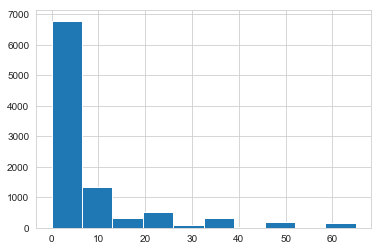

In [28]:
print(df['Age'].describe())

mean_a = np.mean(df['Age'])
std_a = np.std(df['Age'])

df = df[(df['Age']>mean_a-3*std_a)&(df['Age']<mean_a+3*std_a)]

print('After removing outliers:')
print(df['Age'].describe())

plt.figure()
plt.hist(df['Age'])
plt.show

df.head()

In [29]:
#checking for the NANs
for item in [df, df_test]:
    for col in item.columns:
        if (str(col) == '') | (str(col) == 'NaN') | (str(col) == '0') | (str(col) == ' '):
            print('In ', item, ' column to remove: ', col)
            del item[col]
        else:
            for cell in item[col]:
                if pd.isnull(cell):
                    print(cell, 'Has a NaN value')

#print('Number of NAN per feature in df: \n', df.isnull().sum())
#print('Number of NAN per feature in df_test: \n', df_test.isnull().sum())

# Sending datasets to cvs

In [30]:
df.to_csv('data_1/train_42.csv', index=False)
df_test.to_csv('data_1/test_42.csv', index=False)

======================

# Prediction
======================

In [31]:
# df = pd.read_csv('data/train_11.csv')
# df_test = pd.read_csv('data/test_11.csv')

In [32]:
X = df.copy()
y = df['AdoptionSpeed']
del X['AdoptionSpeed']
del X['PetID']

X.head(5)

,Fee,Age,VideoAmt,PhotoAmt,Gender,Type,Quantity,MaturitySize,Color1,Color2,...,st_41361,st_41367,st_41401,st_41415,num_words,ave_len_words,desc_len,health_1,health_2,health_3
0,0,36,0,1.0,2,1,1,2,2,7,...,0,0,0,0,41,5.59,229,1,0,0
1,0,3,0,1.0,1,2,1,2,6,7,...,0,0,0,0,36,4.78,172,1,0,0
2,0,7,0,2.0,1,2,4,2,1,2,...,0,0,0,0,96,5.52,530,1,0,0
3,0,3,0,4.0,1,1,1,3,2,0,...,0,0,0,0,68,4.97,338,1,0,0
4,0,1,0,0.0,1,2,1,1,1,6,...,0,0,1,0,67,5.18,347,1,0,0


In [33]:
models = [
    #('Naive Bayes', GaussianNB()),
    #('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('RandomForestClassifier300', RandomForestClassifier(n_estimators=300, random_state=42))
    #('KNeighborsClassifier', KNeighborsClassifier(3)),
    #('DecisionTreeClassifier', DecisionTreeClassifier()),
    #('SVM_100', SVC(C=100, gamma='auto'))
]

### Cross Validation

MODEL RandomForestClassifier300


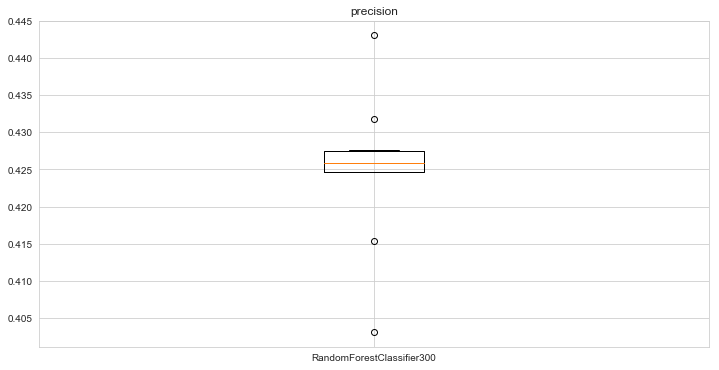

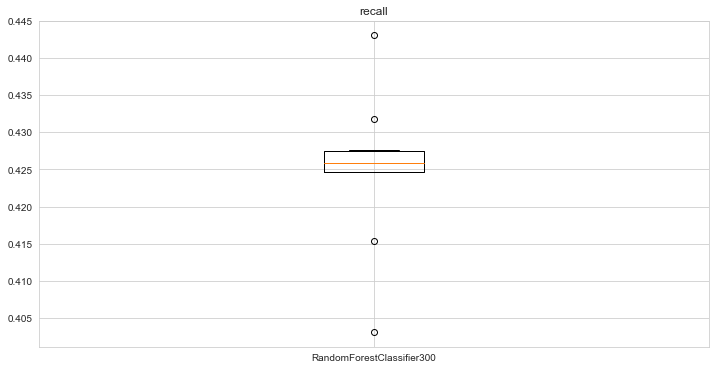

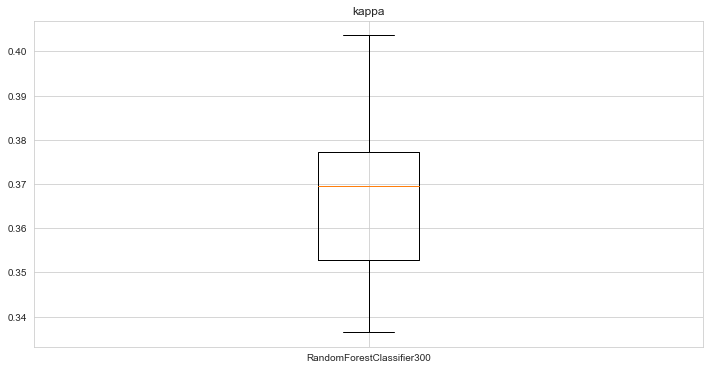

In [34]:
k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[], 'kappa':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)
        results[m[0]]['kappa'].append(kappa)

for metric in ['precision', 'recall', 'kappa']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

### Model Training

In [35]:
# split the data

threshold = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7799, 45)
y_train (7799,)
X_test (1950, 45)
y_test (1950,)


### Model Evaluation

In [36]:
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    print('kappa', round(kappa, 4))
    results.append([m[0], precision, recall, kappa])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X.columns)):
            importance.append([X.columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(15))
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall', 'kappa']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL RandomForestClassifier300
[[  2  21  11   6  23]
 [  0 140 133  50  72]
 [  1  99 198  75 146]
 [  0  69 109 109 125]
 [  0  51  94  57 359]]
Precision 0.41435897435897434
Recall 0.41435897435897434
kappa 0.337
Feature Importance
                0         1
40  ave_len_words  0.106151
41       desc_len  0.104358
39      num_words  0.097847
1             Age  0.078964
3        PhotoAmt  0.077744
11         Breed1  0.053326
9          Color2  0.050256
8          Color1  0.047937
12         Breed2  0.032895
4          Gender  0.030360
7    MaturitySize  0.028191
6        Quantity  0.027152
10         Color3  0.026298
0             Fee  0.024172
27       st_41326  0.018815



,model,precision,recall,kappa
0,RandomForestClassifier300,0.414359,0.414359,0.336979


### Running chosen model

In [37]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
print(model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
print('kappa', round(kappa, 4))
print(confusion_matrix(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
kappa 0.337
[[  2  21  11   6  23]
 [  0 140 133  50  72]
 [  1  99 198  75 146]
 [  0  69 109 109 125]
 [  0  51  94  57 359]]


### Tuning the Thresholds

In [38]:
# model = RandomForestClassifier(n_estimators=100)
# model.fit(X_train, y_train)
#print(model.predict_proba(X_test))
# y_pred = model.predict_proba(X_test)[:,4]

# y_pred = [4 if x > 0.3 else  for x in y_pred]
# print(y_pred)

# #for i in range(4,6):
# #    print(i)
# #    y_pred = model.predict_proba(X_test)[:,1]
# #    y_pred = [1 if x > i/10.0 else 0 for x in y_pred]
# precision = precision_score(y_test, y_pred, average='micro')
# recall = recall_score(y_test, y_pred, average='micro')
# kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
# print(confusion_matrix(y_test, y_pred))
# print('Precision', precision)
# print('Recall', recall)
# print('Kappa', kappa)    

In [39]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
#               'kernel': ['rbf', 'linear'], 
#               'gamma': ['auto', 'scale']
#              }
# clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
# clf = clf.fit(X_train, y_train)
# print("Best estimator found by grid search:")
# print(clf.best_estimator_)

# y_pred = clf.predict(X_test)
# print('SVC f1 score: ', metrics.f1_score(y_test,y_pred,average="macro"))
# print('Kappa: ', cohen_kappa_score(y_test, y_pred, weights ='quadratic'))
# #print('cross_val_score mean: ', np.mean(cvs))
# print(metrics.confusion_matrix(y_test, y_pred))

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

# model = SVC(C=0.01, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovr', 
#             degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, 
#             tol=0.001, verbose=False)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
# print('kappa', round(kappa, 4))
# print(confusion_matrix(y_test, y_pred))

# Submission

In [41]:
# df_prediction = df_test.copy()
# del df_prediction['PetID']

# df_test['AdoptionSpeed'] = model.predict(df_prediction)
# df_test[['PetID', 'AdoptionSpeed']]

In [42]:
# df_test[['PetID', 'AdoptionSpeed']].to_csv('s_3.csv', index=False)